# PyTplot pseudo variables

This notebook shows how to work with pseudo variables in PyTplot

In [ ]:
!pip install pyspedas

In [ ]:
import pyspedas

In [ ]:
pyspedas.mms.fpi(datatype='des-moms', trange=['2015-10-16', '2015-10-17'])
pyspedas.mms.edp(trange=['2015-10-16', '2015-10-17'], datatype='scpot')

Create a pseudo variable containing the perpendicular and parallel temperatures

In [ ]:
from pytplot import store_data

In [ ]:
store_data('temp', data=['mms1_des_tempperp_fast', 'mms1_des_temppara_fast'])

True

Plot the pseudo variable

Note: by default, the figure uses the metadata from the first variable in the list

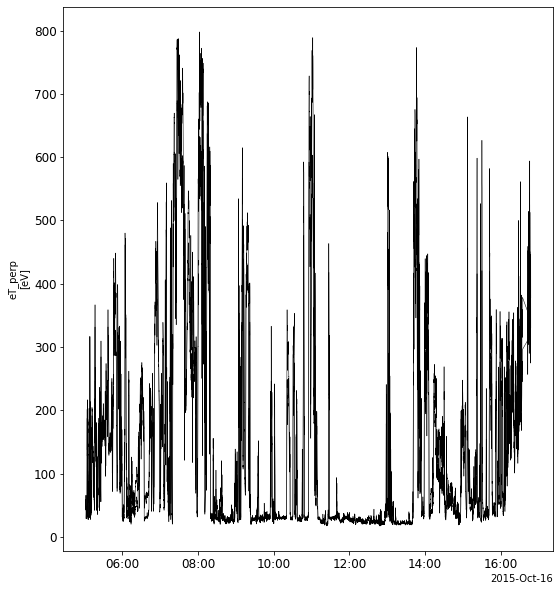

In [ ]:
from pytplot import tplot

tplot('temp')

The plot options can be updated just like a normal tplot variable

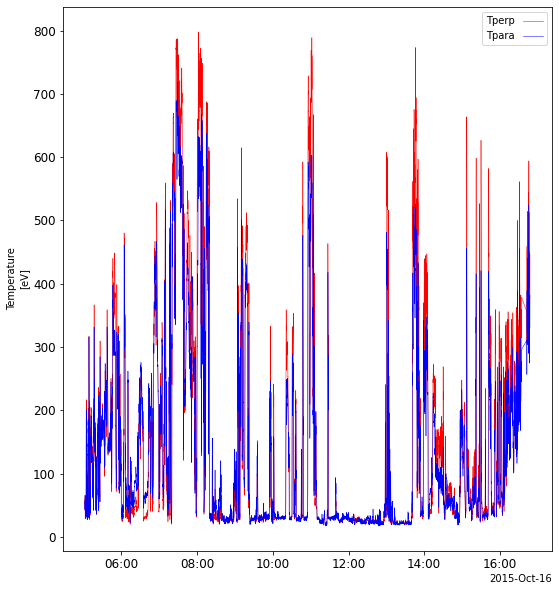

In [ ]:
from pytplot import options

options('temp', 'ytitle', 'Temperature')
options('temp', 'color', ['red', 'blue'])
options('temp', 'legend_names', ['Tperp', 'Tpara'])

tplot('temp')

Pseudo variables can be used to plot lines over spectrograms, e.g., to plot the spacecraft potential over the ion energy spectra:


In [ ]:
store_data('spec', data=['mms1_des_energyspectr_omni_fast', 'mms1_edp_scpot_fast_l2'])

True

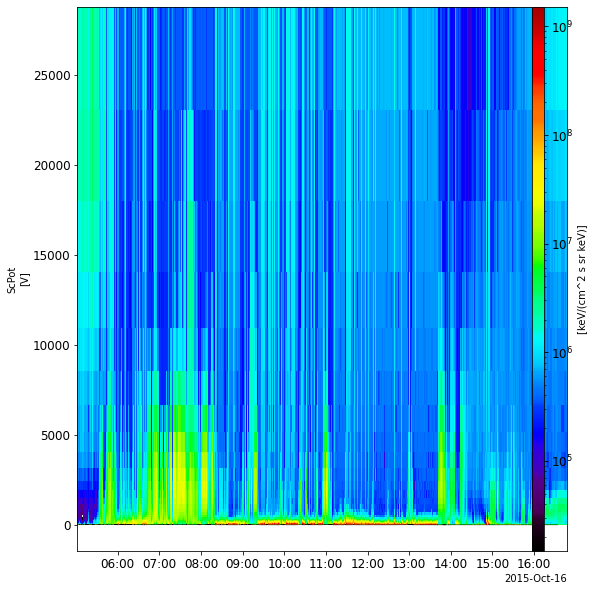

In [ ]:
tplot('spec')

Options set on the variables used in the pseudo variable can be adjusted directly, e.g., 

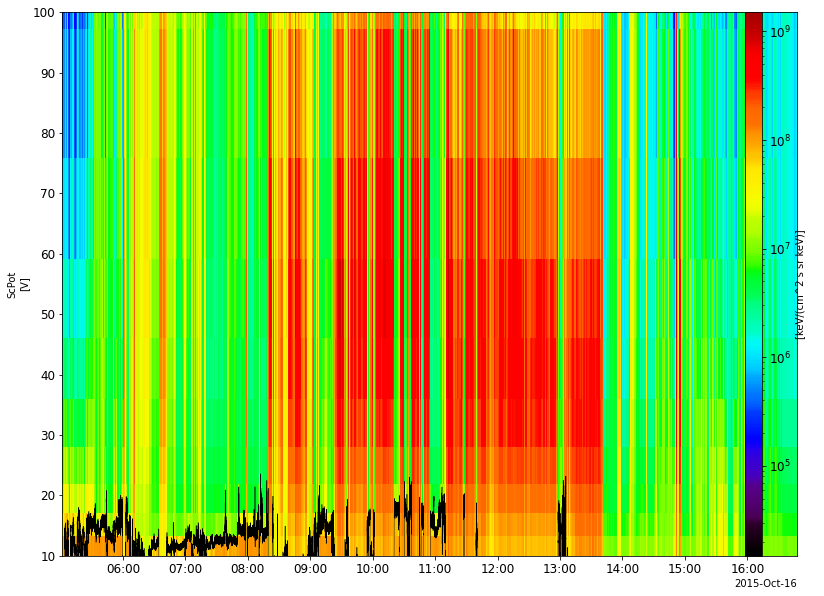

In [ ]:
options('mms1_edp_scpot_fast_l2', 'yrange', [10, 100])

tplot('spec', xsize=12)

You may have to adjust some plot options for the figure to come out nicely, e.g., to plot the S/C potential on the right axis, use the `right_axis` option, and increase the margin to include enough space for the new axis

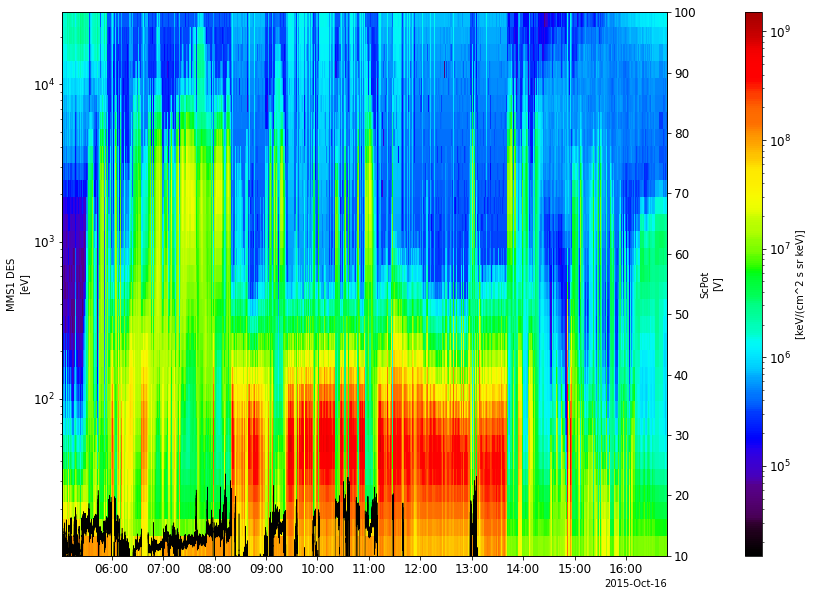

In [ ]:
from pytplot import tplot_options

options('spec', 'right_axis', True)
tplot_options('xmargin', [0.1, 0.2])

tplot('spec', xsize=12)